In [20]:
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML, display
from scipy import stats
import ace
import tools 
from pandas import json_normalize



In [3]:
url = '../data/juegos_rawg.csv'
data = pd.read_csv(url)

# Exploracion Inicial

In [4]:
df = data.copy()

In [5]:
df.head()

,slug,name,playtime,platforms,stores,released,tba,background_image,rating,rating_top,...,tags,esrb_rating,user_game,reviews_count,saturated_color,dominant_color,short_screenshots,parent_platforms,genres,community_rating
0,grand-theft-auto-v,Grand Theft Auto V,74,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2013-09-17,False,https://media.rawg.io/media/games/20a/20aa03a1...,4.47,5,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature', ...",NaN,7073,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action'}]",NaN
1,the-witcher-3-wild-hunt,The Witcher 3: Wild Hunt,43,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-05-18,False,https://media.rawg.io/media/games/618/618c2031...,4.65,5,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature', ...",NaN,6840,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action'}...",NaN
2,tomb-raider,Tomb Raider (2013),10,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2013-03-05,False,https://media.rawg.io/media/games/021/021c4e21...,4.06,4,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature', ...",NaN,3968,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action'}...",NaN
3,portal,Portal,4,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2007-10-09,False,https://media.rawg.io/media/games/7fa/7fa0b586...,4.50,5,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",NaN,4822,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action'}...",NaN
4,the-elder-scrolls-v-skyrim,The Elder Scrolls V: Skyrim,46,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2011-11-11,False,https://media.rawg.io/media/games/7cf/7cfc9220...,4.43,5,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature', ...",NaN,4735,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action'}...",NaN


In [6]:
df.tail()

,slug,name,playtime,platforms,stores,released,tba,background_image,rating,rating_top,...,tags,esrb_rating,user_game,reviews_count,saturated_color,dominant_color,short_screenshots,parent_platforms,genres,community_rating
5217,the-otterman-empire,The Otterman Empire,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2020-07-02,False,https://media.rawg.io/media/screenshots/019/01...,0.0,0,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 1, 'name': 'Everyone', 'slug': 'everyon...",NaN,0,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 40, 'name': 'Casual', 'slug': 'casual'...",0.0
5218,jacks-or-better-video-poker,Jacks or Better - Video Poker,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2020-06-12,False,https://media.rawg.io/media/screenshots/0e7/0e...,0.0,0,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",NaN,0,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 40, 'name': 'Casual', 'slug': 'casual'...",0.0
5219,jumanji-the-curse-returns,Jumanji: The Curse Returns,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2021-09-01,True,https://media.rawg.io/media/screenshots/eea/ee...,0.0,0,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 2, 'name': 'Everyone 10+', 'slug': 'eve...",NaN,0,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",0.0
5220,avocuddle,AvoCuddle,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2019-07-12,False,https://media.rawg.io/media/screenshots/df2/df...,0.0,0,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 2, 'name': 'Everyone 10+', 'slug': 'eve...",NaN,0,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 51, 'name': 'Indie', 'slug': 'indie'},...",0.0
5221,tarzan-vr,Tarzan VR,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2020-11-17,False,https://media.rawg.io/media/games/64a/64a11dd3...,0.0,0,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",NaN,0,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",0.0


In [7]:
df.shape

(5222, 31)

# Exploracion Inicial

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5222 entries, 0 to 5221
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   slug                5222 non-null   object 
 1   name                5222 non-null   object 
 2   playtime            5222 non-null   int64  
 3   platforms           5222 non-null   object 
 4   stores              5198 non-null   object 
 5   released            5222 non-null   object 
 6   tba                 5222 non-null   bool   
 7   background_image    5221 non-null   object 
 8   rating              5222 non-null   float64
 9   rating_top          5222 non-null   int64  
 10  ratings             5222 non-null   object 
 11  ratings_count       5222 non-null   int64  
 12  reviews_text_count  5222 non-null   int64  
 13  added               5222 non-null   int64  
 14  added_by_status     5111 non-null   object 
 15  metacritic          1894 non-null   float64
 16  sugges

In [9]:
df.isnull().sum()

slug                     0
name                     0
playtime                 0
platforms                0
stores                  24
released                 0
tba                      0
background_image         1
rating                   0
rating_top               0
ratings                  0
ratings_count            0
reviews_text_count       0
added                    0
added_by_status        111
metacritic            3328
suggestions_count        0
updated                  0
id                       0
score                 5222
clip                  5222
tags                     0
esrb_rating           2364
user_game             5222
reviews_count            0
saturated_color          0
dominant_color           0
short_screenshots        0
parent_platforms         0
genres                   0
community_rating      3291
dtype: int64

## Eliminar columnas irrelevantes

In [11]:
df.drop(columns=['score', 'clip', 'user_game', 'background_image', 'short_screenshots', 
                   'saturated_color', 'dominant_color', 'parent_platforms', 'platforms','tba', 'community_rating', 'esrb_rating'],inplace=True)


In [32]:
print(df.columns)

Index(['slug', 'name', 'playtime', 'stores', 'released', 'rating',
       'rating_top', 'ratings', 'ratings_count', 'reviews_text_count', 'added',
       'added_by_status', 'metacritic', 'suggestions_count', 'updated', 'id',
       'tags', 'reviews_count', 'genres'],
      dtype='object')


## Manejar valores nulos

In [33]:
df.dropna()

,slug,name,playtime,stores,released,rating,rating_top,ratings,ratings_count,reviews_text_count,added,added_by_status,metacritic,suggestions_count,updated,id,tags,reviews_count,genres
0,grand-theft-auto-v,Grand Theft Auto V,74,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2013-09-17,4.47,5,"[{'id': 5, 'title': 'exceptional', 'count': 41...",6965,63,21632,"{'yet': 537, 'owned': 12534, 'beaten': 6089, '...",92.0,439,2024-12-24T04:01:56,3498,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...",7073,"[{'id': 4, 'name': 'Action', 'slug': 'action'}]"
1,the-witcher-3-wild-hunt,The Witcher 3: Wild Hunt,43,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-05-18,4.65,5,"[{'id': 5, 'title': 'exceptional', 'count': 52...",6730,76,21237,"{'yet': 1144, 'owned': 12500, 'beaten': 4940, ...",92.0,681,2024-12-24T07:31:51,3328,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...",6840,"[{'id': 4, 'name': 'Action', 'slug': 'action'}..."
2,tomb-raider,Tomb Raider (2013),10,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2013-03-05,4.06,4,"[{'id': 4, 'title': 'recommended', 'count': 23...",3938,14,17347,"{'yet': 690, 'owned': 11420, 'beaten': 4295, '...",86.0,656,2024-12-25T00:02:18,5286,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...",3968,"[{'id': 4, 'name': 'Action', 'slug': 'action'}..."
3,portal,Portal,4,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2007-10-09,4.50,5,"[{'id': 5, 'title': 'exceptional', 'count': 28...",4781,28,17222,"{'yet': 455, 'owned': 10925, 'beaten': 5085, '...",90.0,302,2024-12-24T04:01:36,13536,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...",4822,"[{'id': 4, 'name': 'Action', 'slug': 'action'}..."
4,the-elder-scrolls-v-skyrim,The Elder Scrolls V: Skyrim,46,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2011-11-11,4.43,5,"[{'id': 5, 'title': 'exceptional', 'count': 27...",4686,34,16280,"{'yet': 508, 'owned': 9806, 'beaten': 3813, 't...",94.0,609,2024-12-24T04:03:16,5679,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...",4735,"[{'id': 4, 'name': 'Action', 'slug': 'action'}..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,golden-force,Golden Force,0,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2021-01-28,0.00,0,[],0,0,2,"{'yet': 1, 'owned': 1}",65.0,270,2021-04-23T03:41:23,545160,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...",0,"[{'id': 51, 'name': 'Indie', 'slug': 'indie'},..."
4983,gunbrick-reloaded,Gunbrick: Reloaded,0,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2020-04-09,0.00,0,"[{'id': 1, 'title': 'skip', 'count': 1, 'perce...",1,0,2,"{'owned': 1, 'toplay': 1}",74.0,353,2023-04-03T11:57:54,427554,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...",1,"[{'id': 40, 'name': 'Casual', 'slug': 'casual'..."
5022,vitamin-connection,Vitamin Connection,0,"[{'store': {'id': 6, 'name': 'Nintendo Store',...",2020-02-20,0.00,0,"[{'id': 4, 'title': 'recommended', 'count': 1,...",1,0,1,{'dropped': 1},80.0,136,2020-12-29T12:21:48,532225,"[{'id': 7, 'name': 'Multiplayer', 'slug': 'mul...",1,"[{'id': 19, 'name': 'Family', 'slug': 'family'..."
5082,half-past-fate-romantic-distancing,Half Past Fate: Romantic Distancing,0,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2021-02-14,0.00,0,[],0,0,1,{'toplay': 1},55.0,178,2021-02-17T09:50:17,557693,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...",0,"[{'id': 40, 'name': 'Casual', 'slug': 'casual'..."


In [34]:
(df.isnull().sum() / len(df))*100

slug                   0.000000
name                   0.000000
playtime               0.000000
stores                 0.459594
released               0.000000
rating                 0.000000
rating_top             0.000000
ratings                0.000000
ratings_count          0.000000
reviews_text_count     0.000000
added                  0.000000
added_by_status        2.125622
metacritic            63.730372
suggestions_count      0.000000
updated                0.000000
id                     0.000000
tags                   0.000000
reviews_count          0.000000
genres                 0.000000
dtype: float64

In [35]:
total = df.isnull().sum().sort_values(ascending = False) 
total

metacritic            3328
added_by_status        111
stores                  24
playtime                 0
name                     0
slug                     0
released                 0
ratings                  0
ratings_count            0
rating                   0
rating_top               0
added                    0
reviews_text_count       0
suggestions_count        0
updated                  0
id                       0
tags                     0
reviews_count            0
genres                   0
dtype: int64

## Actualizando valores faltantes

In [36]:
df['metacritic'].fillna(df['metacritic'].median())


0       92.0
1       92.0
2       86.0
3       90.0
4       94.0
        ... 
5217    75.0
5218    75.0
5219    75.0
5220    75.0
5221    75.0
Name: metacritic, Length: 5222, dtype: float64

### Rellenar 'added_by_status' y 'stores' con "Desconocido"

In [37]:
df['added_by_status'] = df['added_by_status'].fillna("Desconocido")
df['stores'] = df ['stores'].fillna("Desconocido")


# Documentación de cada columna y su significado

| Columna              | Descripción                                                                                     | Observaciones                                                                                               |
|----------------------|-------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| Unnamed: 0          | Índice sin nombre, posiblemente redundante.                                                     | Puede eliminarse si no aporta información única.                                                           |
| slug                | Identificador único en formato texto para cada juego.                                           | Es útil para identificar juegos de forma única, pero no es legible para el usuario.                        |
| name                | Nombre completo del juego.                                                                      | Información principal y visible para el usuario.                                                           |
| playtime            | Tiempo promedio de juego en horas.                                                              | Puede contener valores bajos o nulos para juegos menos populares.                                          |
| stores              | Tiendas donde el juego está disponible, en formato JSON.                                        | Requiere desanidar para obtener datos como nombres de tiendas o URLs específicas.                          |
| released            | Fecha de lanzamiento del juego.                                                                 | Puede contener valores nulos para juegos aún no lanzados.                                                  |
| rating              | Calificación promedio del juego (en base a opiniones de usuarios).                              | Es una métrica importante de calidad, pero debe analizarse junto a `ratings_count` para contexto.          |
| rating_top          | Calificación máxima disponible (e.g., 5 estrellas).                                             | Puede ser redundante, pero útil para verificar si un juego alcanza la calificación máxima.                 |
| ratings             | Detalle de calificaciones divididas en varias categorías, en formato JSON.                      | Es necesario desanidar para análisis detallado, como "exceptional", "recommended", etc.                    |
| ratings_count       | Número total de calificaciones recibidas.                                                       | Complementa a `rating` y da contexto sobre la cantidad de usuarios que calificaron.                        |
| reviews_text_count  | Número de reseñas que incluyen texto.                                                           | Útil para análisis de sentimientos o revisiones detalladas.                                                |
| added               | Total de veces que el juego fue agregado a listas de usuarios.                                  | Es una métrica de popularidad que puede correlacionar con `playtime` o `ratings_count`.                    |
| added_by_status     | Detalles sobre cómo los usuarios clasificaron el juego, en formato JSON.                        | Requiere procesamiento adicional para dividir categorías como "owned", "beaten", etc.                      |
| metacritic          | Puntuación promedio en Metacritic.                                                              | Métrica externa de calidad, puede no estar presente para algunos juegos.                                   |
| suggestions_count   | Número de juegos sugeridos similares.                                                           | Puede indicar qué tan conectado está un juego con otros en términos de género o popularidad.               |
| updated             | Última fecha de actualización de los datos del juego.                                           | Indica la frescura de los datos, especialmente relevante para juegos en desarrollo o con DLC recientes.    |
| id                  | Identificador único del juego.                                                                  | Esencial para uniones o referencias cruzadas con otras tablas.                                             |
| tags                | Etiquetas asociadas al juego, en formato JSON.                                                  | Requiere desanidar para obtener insights como características o temáticas comunes.                         |
| reviews_count       | Número total de reseñas.                                                                        | Complementa `reviews_text_count`, puede incluir reseñas con y sin texto.                                   |
| genres              | Géneros a los que pertenece el juego, en formato JSON.                                          | Necesita desanidarse para obtener información granular sobre géneros.                                      |


### Observaciones generales:
1. Varias columnas tienen estructuras anidadas (e.g., stores, ratings, tags, genres) que requieren un procesamiento adicional para su análisis.
2. Las métricas como rating, ratings_count, y added son útiles para evaluar la popularidad y calidad percibida de los juegos.


In [38]:
# Función para convertir texto a objetos Python
def convert_to_json(data):
    try:
        return ast.literal_eval(data)
    except (ValueError, SyntaxError):
        return None

# Función para desanidar columnas
def desanidar_columna(dataframe, column_name):
    """
    Convierte cadenas JSON-like, explota listas y normaliza diccionarios en una columna específica.
    """
    # Convertir las cadenas JSON-like a estructuras Python
    dataframe[column_name] = dataframe[column_name].dropna().apply(convert_to_json)
    
    # Explode: Expande listas en múltiples filas
    exploded = dataframe[column_name].explode().dropna()
    
    # Normalizar diccionarios si están presentes
    desanidado = json_normalize(exploded)
    
    return desanidado

# Ejemplo con las columnas del DataFrame
stores_df = desanidar_columna(df, 'stores')
ratings_df = desanidar_columna(df, 'ratings')
tags_df = desanidar_columna(df, 'tags')
genres_df = desanidar_columna(df, 'genres')

# Mostrar resultados
print("Stores desanidado:")
display(stores_df.head())

print("Ratings desanidado:")
display(ratings_df.head())

print("Tags desanidado:")
display(tags_df.head())

print("Genres desanidado:")
display(genres_df.head())


Stores desanidado:


,store.id,store.name,store.slug
0,1,Steam,steam
1,3,PlayStation Store,playstation-store
2,2,Xbox Store,xbox-store
3,7,Xbox 360 Store,xbox360
4,11,Epic Games,epic-games


Ratings desanidado:


,id,title,count,percent
0,5,exceptional,4182,59.13
1,4,recommended,2309,32.65
2,3,meh,449,6.35
3,1,skip,133,1.88
4,5,exceptional,5253,76.80


Tags desanidado:


,id,name,slug,language,games_count,image_background
0,31,Singleplayer,singleplayer,eng,233006,https://media.rawg.io/media/games/20a/20aa03a1...
1,42396,Для одного игрока,dlia-odnogo-igroka,rus,56285,https://media.rawg.io/media/games/310/3106b0e0...
2,42417,Экшен,ekshen,rus,43600,https://media.rawg.io/media/games/7cf/7cfc9220...
3,42392,Приключение,prikliuchenie,rus,41802,https://media.rawg.io/media/games/b7b/b7b83817...
4,40847,Steam Achievements,steam-achievements,eng,42372,https://media.rawg.io/media/games/8cc/8cce7c0e...


Genres desanidado:


,id,name,slug
0,4,Action,action
1,4,Action,action
2,5,RPG,role-playing-games-rpg
3,4,Action,action
4,6,Fighting,fighting


# Resultado esperado:
- Stores: Cada fila corresponde a una tienda con columnas como id, name, y slug.
- Tags: Cada fila contiene una etiqueta asociada a un juego, con columnas como id, name, y slug.
- Genres: Cada fila describe un género asociado al juego, con columnas como id, name, y slug.

# Guardar el dataset limpio

In [39]:
df.to_csv('juegos_rawg_limpio.csv')

In [40]:
df = pd.read_csv('juegos_rawg_limpio.csv')
print("Dataset limpio exportado como juegos_rawg_limpio.csv'")


Dataset limpio exportado como juegos_rawg_limpio.csv'


# Analisis Exploratorio

In [41]:
df.describe(include='all')

,Unnamed: 0,slug,name,playtime,stores,released,rating,rating_top,ratings,ratings_count,reviews_text_count,added,added_by_status,metacritic,suggestions_count,updated,id,tags,reviews_count,genres
count,5222.000000,5222,5222,5222.000000,5198,5222,5222.000000,5222.000000,5222,5222.000000,5222.000000,5222.000000,5222,1894.000000,5222.000000,5222,5222.000000,5222,5222.000000,5222
unique,NaN,5222,5222,NaN,243,2432,NaN,NaN,3017,NaN,NaN,NaN,4562,NaN,NaN,5045,NaN,5204,NaN,579
top,NaN,tarzan-vr,Tarzan VR,NaN,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2019-09-19,NaN,NaN,[],NaN,NaN,NaN,Desconocido,NaN,NaN,2019-08-28T21:59:25,NaN,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...",NaN,"[{'id': 51, 'name': 'Indie', 'slug': 'indie'},..."
freq,NaN,1,1,NaN,509,14,NaN,NaN,767,NaN,NaN,NaN,111,NaN,NaN,7,NaN,3,NaN,416
mean,2610.500000,NaN,NaN,3.311949,NaN,NaN,2.049284,2.271735,NaN,140.648028,1.267331,900.679433,NaN,73.592397,343.419571,NaN,200103.923592,NaN,142.556492,NaN
std,1507.605884,NaN,NaN,6.309711,NaN,NaN,1.725586,1.902700,NaN,418.082248,4.150511,1905.044868,NaN,10.173231,175.648483,NaN,253839.630143,NaN,423.320583,NaN
min,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,15.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN
25%,1305.250000,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,NaN,2.000000,0.000000,29.000000,NaN,68.000000,215.000000,NaN,10823.000000,NaN,2.000000,NaN
50%,2610.500000,NaN,NaN,2.000000,NaN,NaN,2.830000,3.000000,NaN,11.000000,0.000000,156.000000,NaN,75.000000,324.000000,NaN,51370.000000,NaN,12.000000,NaN
75%,3915.750000,NaN,NaN,4.000000,NaN,NaN,3.580000,4.000000,NaN,70.000000,1.000000,843.000000,NaN,80.000000,456.000000,NaN,367178.250000,NaN,71.000000,NaN


## Variable numericas

In [12]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns

In [16]:
df[numericas].columns

Index(['playtime', 'rating', 'rating_top', 'ratings_count',
       'reviews_text_count', 'added', 'metacritic', 'suggestions_count', 'id',
       'reviews_count'],
      dtype='object')

### Visualizacion Histogramas

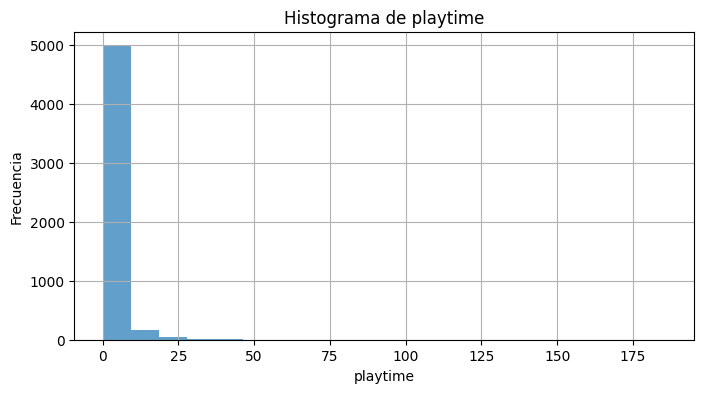

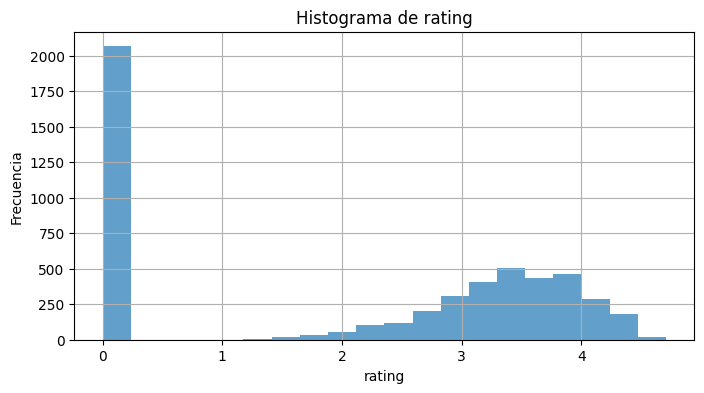

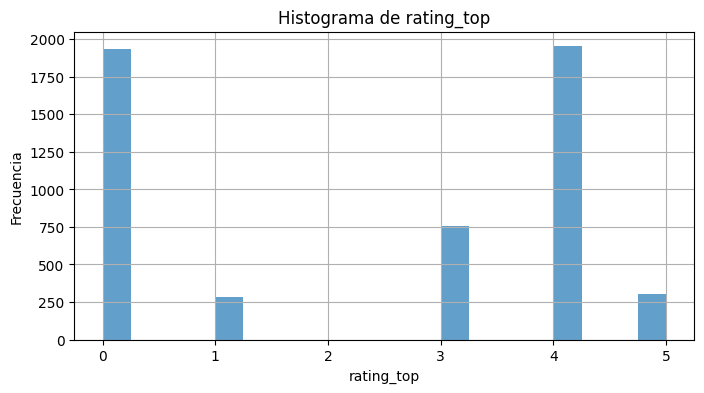

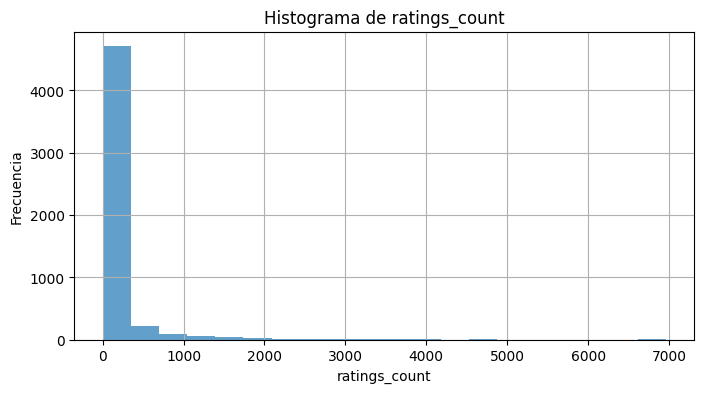

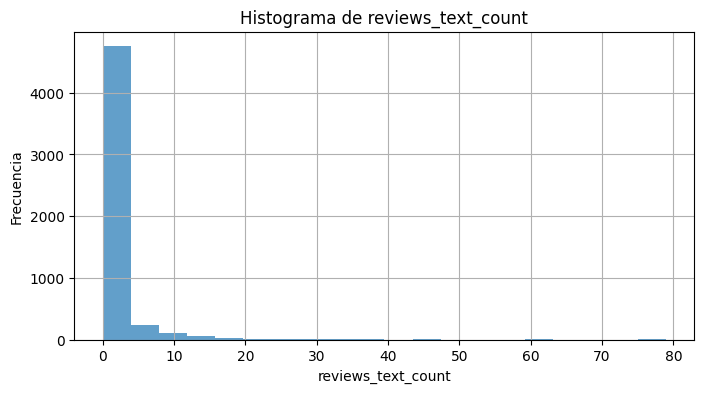

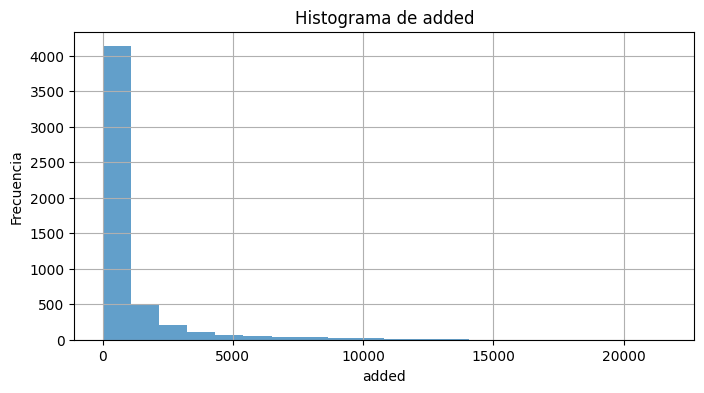

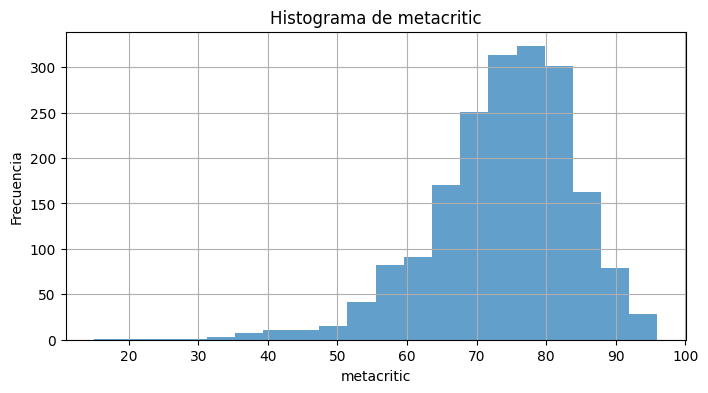

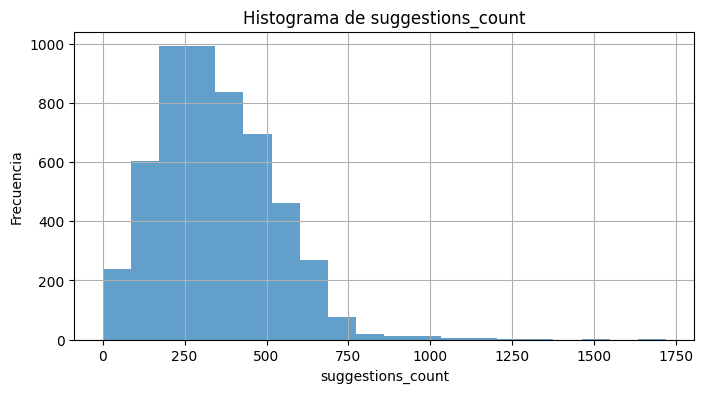

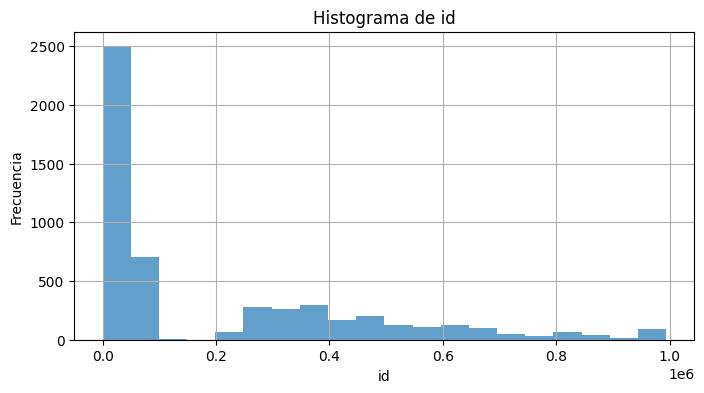

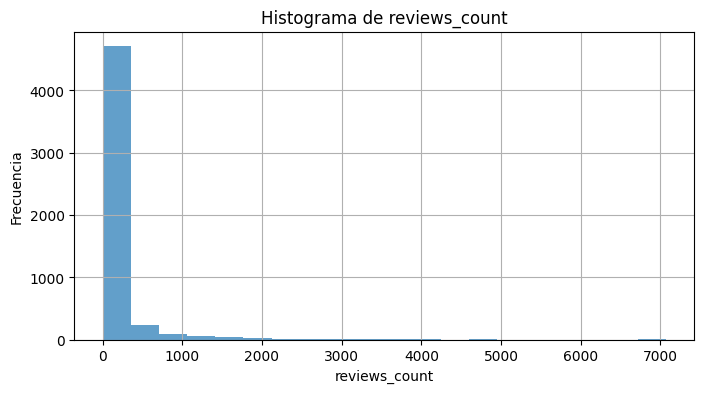

In [17]:
for col in numericas:
    plt.figure(figsize=(8, 4))
    df[col].hist(bins=20, alpha=0.7)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


### Visualizacion Box plots

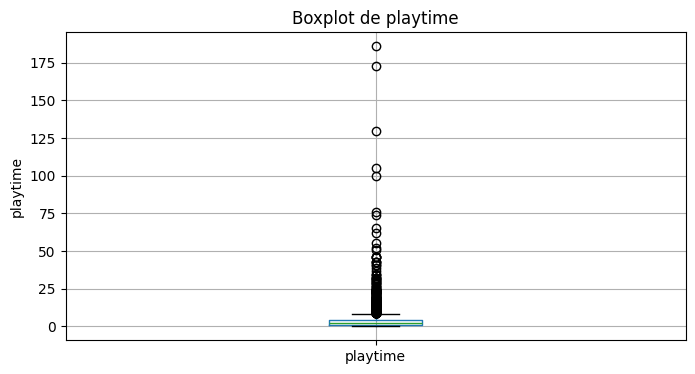

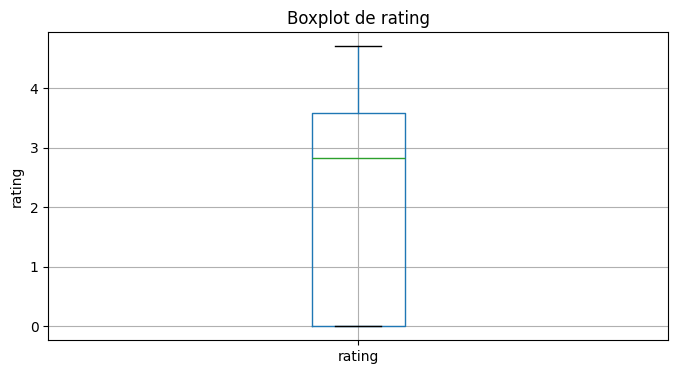

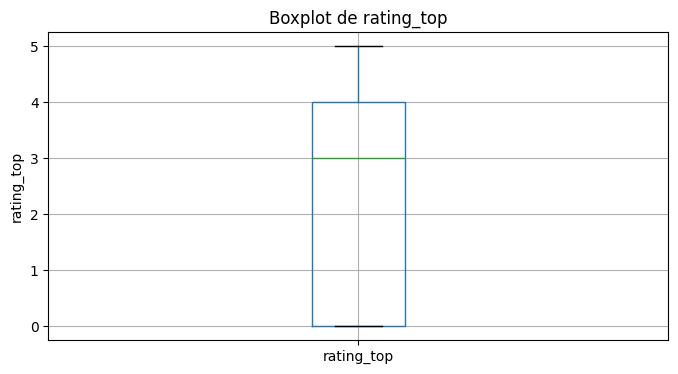

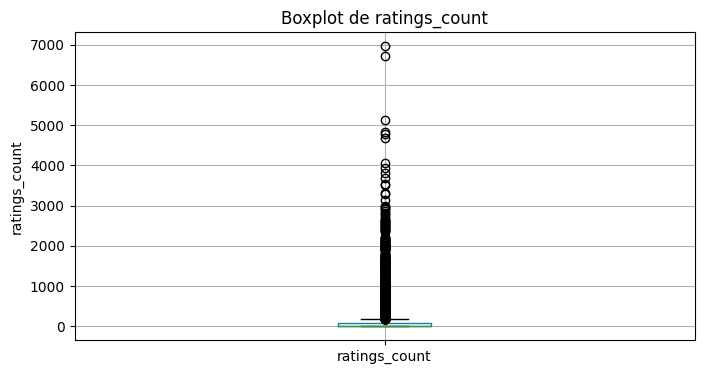

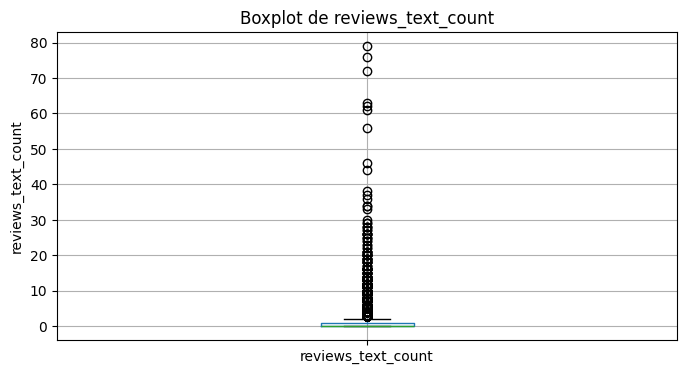

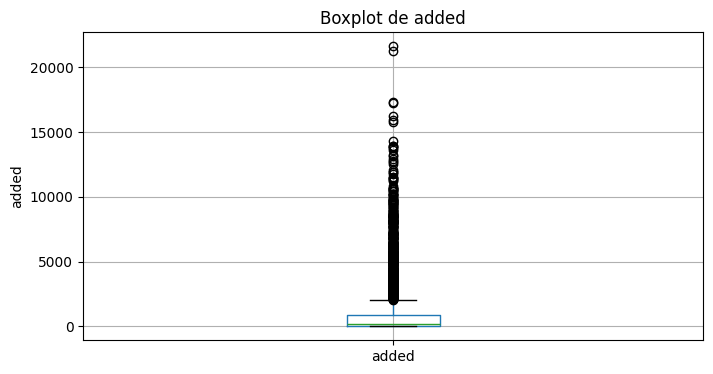

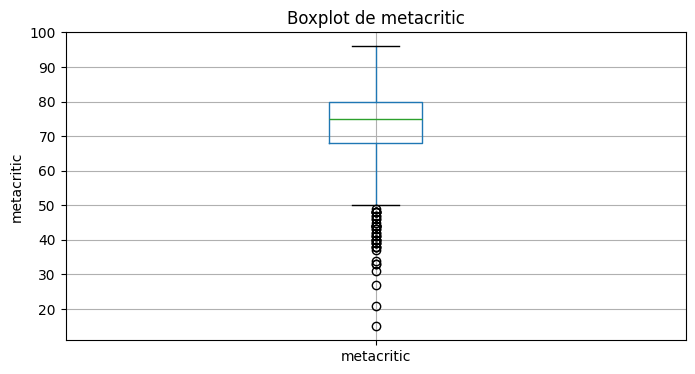

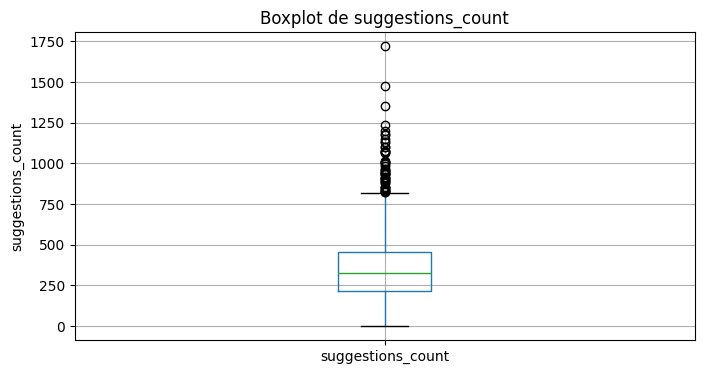

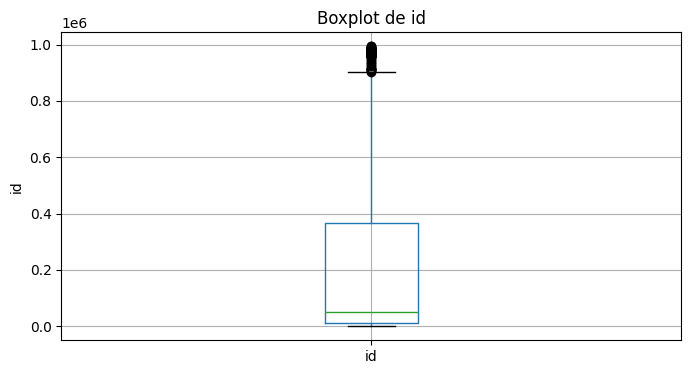

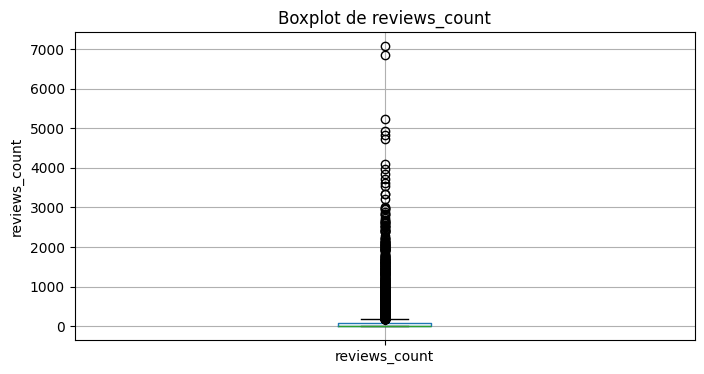

In [18]:
for col in numericas:
    plt.figure(figsize=(8, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
    plt.show()

In [21]:
correlation = df[numericas].corr()

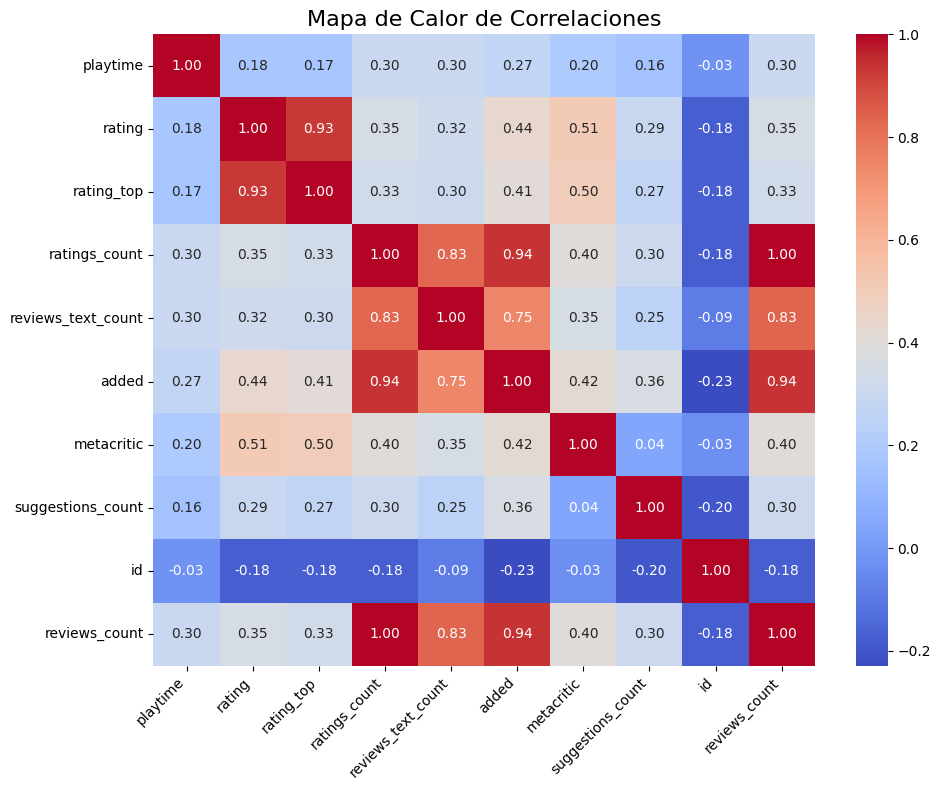

In [22]:
 #Configuración del mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Títulos y etiquetas
plt.title("Mapa de Calor de Correlaciones", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Analisis descriptivo

In [23]:
df[numericas].describe()

,playtime,rating,rating_top,ratings_count,reviews_text_count,added,metacritic,suggestions_count,id,reviews_count
count,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,1894.000000,5222.000000,5222.000000,5222.000000
mean,3.311949,2.049284,2.271735,140.648028,1.267331,900.679433,73.592397,343.419571,200103.923592,142.556492
std,6.309711,1.725586,1.902700,418.082248,4.150511,1905.044868,10.173231,175.648483,253839.630143,423.320583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,2.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,0.000000,29.000000,68.000000,215.000000,10823.000000,2.000000
50%,2.000000,2.830000,3.000000,11.000000,0.000000,156.000000,75.000000,324.000000,51370.000000,12.000000
75%,4.000000,3.580000,4.000000,70.000000,1.000000,843.000000,80.000000,456.000000,367178.250000,71.000000
max,186.000000,4.710000,5.000000,6965.000000,79.000000,21632.000000,96.000000,1719.000000,993849.000000,7073.000000


### He calculado las estadísticas descriptivas de las columnas numéricas seleccionadas. Esto incluye valores como:

- Count: Número de observaciones no nulas.
- Mean: Promedio.
- Std: Desviación estándar.
- Min y Max: Valores mínimo y máximo.
- 25%, 50% (mediana), y 75%: Cuartiles.

# Relaciones Observadas
### ratings_count y reviews_count:

Correlación extremadamente alta (~1). Esto sugiere que los juegos con más calificaciones suelen tener más reseñas textuales.
Tiene sentido, ya que ambos indicadores reflejan la popularidad y actividad de los usuarios.
### rating y rating_top:

Correlación alta (~0.93). Esto implica que los juegos con calificaciones promedio más altas suelen tener una alta calificación máxima.
Puedes explorar si esto es consistente entre diferentes géneros o tipos de juegos.
#### ratings_count y added:

Correlación muy alta (~0.94). Los juegos con más calificaciones son también los más agregados a listas de deseos o bibliotecas.
Podría ser interesante explorar cuáles géneros o tiendas tienen los juegos más "agregados".
### metacritic y rating:

Correlación moderada (~0.51). Esto muestra que los puntajes de Metacritic y las calificaciones promedio tienen una relación positiva, pero no perfecta.
Indica que la percepción de los usuarios no siempre coincide con la crítica.
### playtime y ratings_count:

Correlación baja (~0.30). Aunque hay cierta relación positiva, no es fuerte. Esto sugiere que el tiempo de juego promedio no es el único factor que impulsa las calificaciones.

### Variables categoricas

In [28]:
categoricas = df.select_dtypes(include=['object']).columns

In [30]:
frequencies = df[categoricas].value_counts()
print(frequencies)


slug                      name                      stores                                                                                                                                                                                                                                                                                                                                   released    ratings                                                                                                                                                                                                                                                  added_by_status                                                                      updated              tags                                                                                                                                                                                                                                                        

In [31]:
for column in categoricas:
    print(f"Frecuencias de {column}:")
    print(df[column].value_counts())
    print("\n")


Frecuencias de slug:
slug
tarzan-vr                  1
grand-theft-auto-v         1
the-witcher-3-wild-hunt    1
tomb-raider                1
portal                     1
                          ..
god-of-war-2               1
fallout-4                  1
payday-2                   1
destiny-2                  1
bioshock-infinite          1
Name: count, Length: 5222, dtype: int64


Frecuencias de name:
name
Tarzan VR                   1
Grand Theft Auto V          1
The Witcher 3: Wild Hunt    1
Tomb Raider (2013)          1
Portal                      1
                           ..
God of War (2018)           1
Fallout 4                   1
PAYDAY 2                    1
Destiny 2                   1
BioShock Infinite           1
Name: count, Length: 5222, dtype: int64


Frecuencias de stores:
stores
[{'store': {'id': 1, 'name': 'Steam', 'slug': 'steam'}}, {'store': {'id': 3, 'name': 'PlayStation Store', 'slug': 'playstation-store'}}]                                                 

C:\Users\anoni\AppData\Local\Temp\ipykernel_13492\3155307940.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


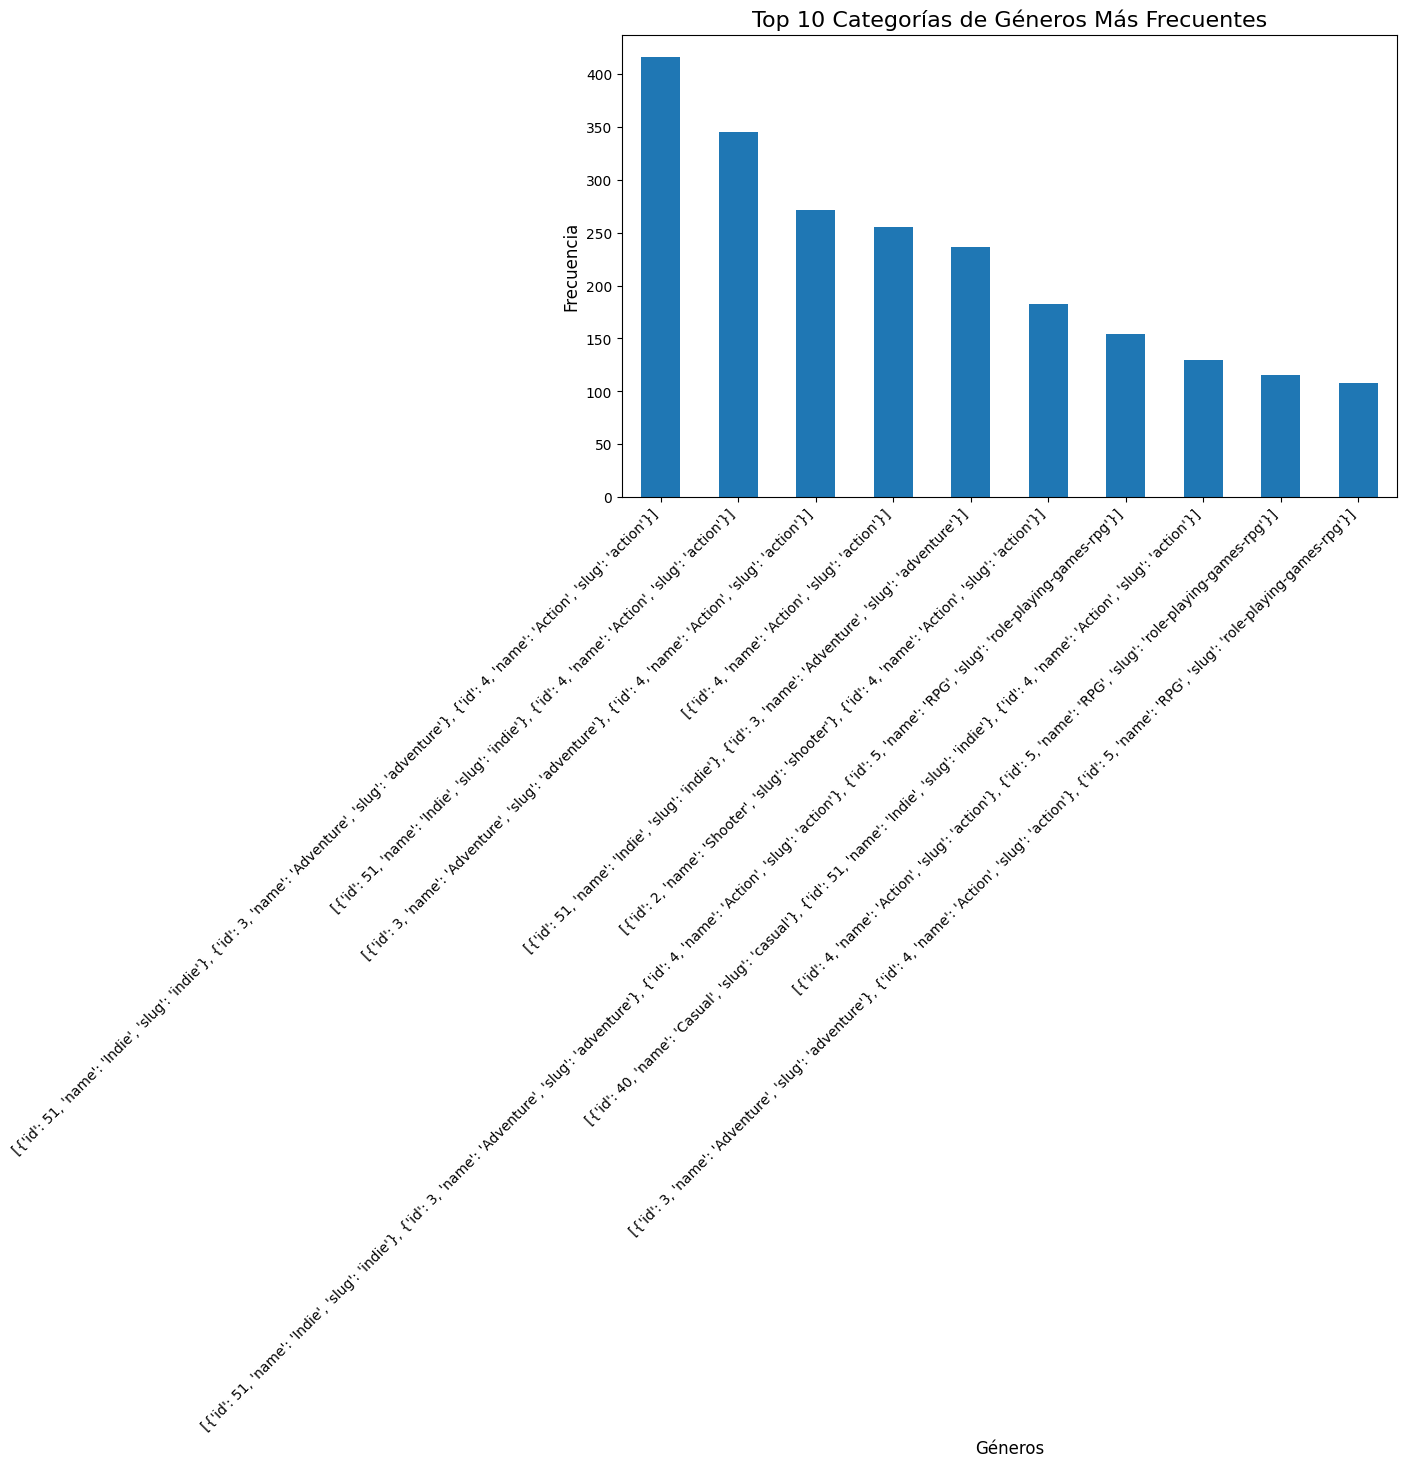

In [46]:
# Gráficos de barras
top_n = 10  
frequencies = df['genres'].explode().value_counts().head(top_n)


plt.figure(figsize=(10, 6))
frequencies.plot(kind='bar')
plt.title(f"Top {top_n} Categorías de Géneros Más Frecuentes", fontsize=16)
plt.xlabel("Géneros", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
# Procesar columnas categóricas que contienen listas o estructuras complejas
def preprocess_column(column):
    if df[column].dtype == 'object' and df[column].apply(lambda x: isinstance(x, list)).any():
        # Si la columna contiene listas, expandirlas
        return df[column].explode().dropna().nunique()
    else:
        # Si no, calcular directamente la cardinalidad
        return df[column].nunique()

# Calcular la cardinalidad para cada columna categórica
cardinality = {column: preprocess_column(column) for column in categoricas}

# Convertir el análisis en un DataFrame para mejor visualización
cardinality_df = pd.DataFrame(list(cardinality.items()), columns=["Columna", "Cardinalidad"]).sort_values(by="Cardinalidad", ascending=False)


In [45]:
pd.DataFrame(cardinality_df)

,Columna,Cardinalidad
0,slug,5222
1,name,5222
7,tags,5204
6,updated,5045
5,added_by_status,4561
4,ratings,3017
3,released,2432
8,genres,579
2,stores,243
